乳腺癌数据集纬度：(569, 30)，阳性样本数：357，阴性样本数：212
184.6 0.2654
[ 184.6       0.2654]
最优特征： worst perimeter ,  worst concave points


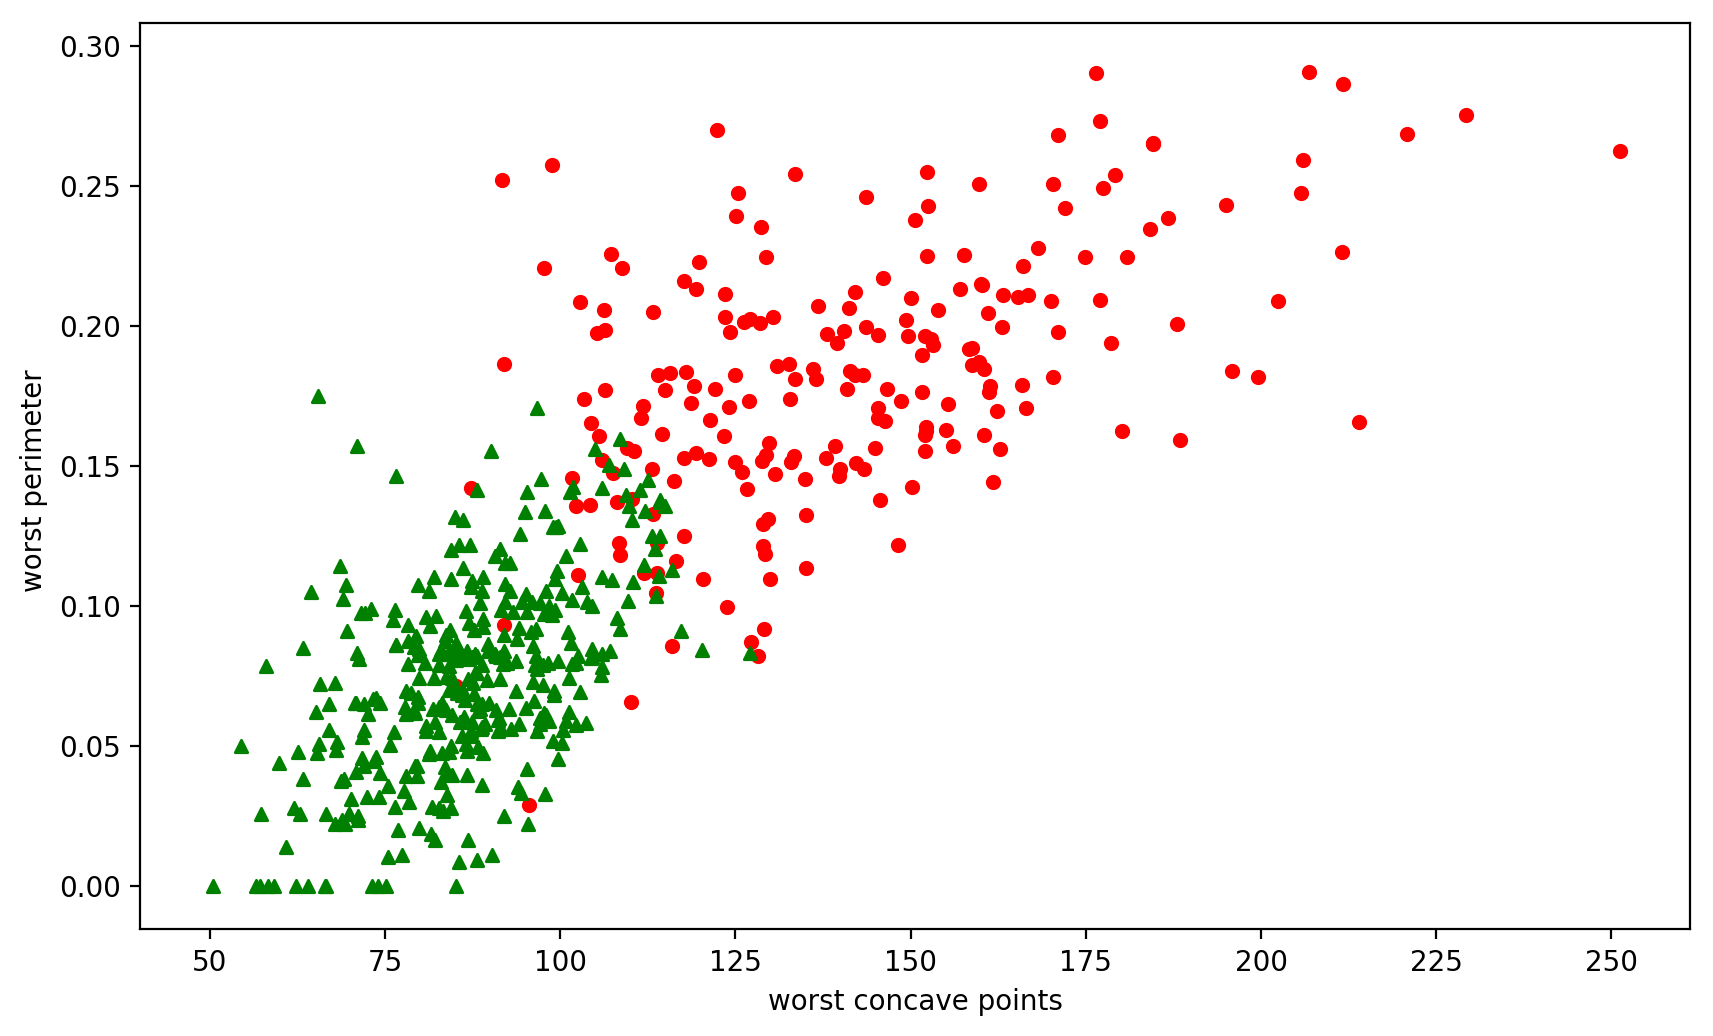

In [1]:
# 使用 SelectKBest 选择高相关性的特征
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print '乳腺癌数据集纬度：{}，阳性样本数：{}，阴性样本数：{}'.format(X.shape, y[y == 1].shape[0], 
                                             y[y == 0].shape[0])
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, y)  # 只选择 2 个与输出值相关性最大的特征
print X[0][22], X[0][27]
print X_new[0]  # 选择了 index = 22、27 的特征
feature_names = cancer.feature_names.tolist()
print '最优特征：', feature_names[22], ', ', feature_names[27]

# 画出数据
plt.figure(figsize=(10, 6), dpi=200)
plt.ylabel('worst perimeter ')
plt.xlabel('worst concave points')
# 画出 Y== 0 的阴性样本，用圆圈表示
plt.scatter(X_new[y==0][:, 0], X_new[y==0][:, 1], c='r', s=20, marker='o')
# 画出 Y== 1 的阳性样本，用三角形表示
plt.scatter(X_new[y==1][:, 0], X_new[y==1][:, 1], c='g', s=20, marker='^')
plt.show()

乳腺癌数据集纬度：(569, 30)，阳性样本数：357，阴性样本数：212
最优的三个特征：mean concave points, worst perimeter, worst concave points


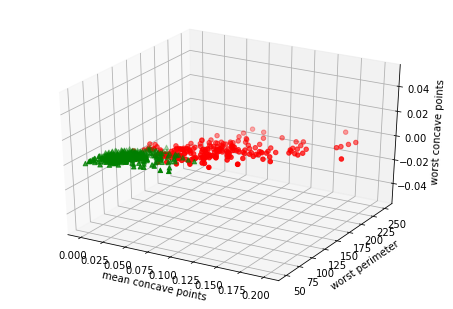

In [2]:
# 选择相关性最高的 3 个特征画图
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print '乳腺癌数据集纬度：{}，阳性样本数：{}，阴性样本数：{}'.format(X.shape, y[y == 1].shape[0], 
                                             y[y == 0].shape[0])

selector = SelectKBest(k=3)
X_new = selector.fit_transform(X, y)
print '最优的三个特征：{}, {}, {}'.format(cancer.feature_names[7], cancer.feature_names[22], 
                                  cancer.feature_names[27])

fig = plt.figure()
ax = Axes3D(fig)
# 画出 Y== 0 的阴性样本，用圆圈表示
plt.scatter(X_new[y==0][:, 0], X_new[y==0][:, 1], c='r', s=20, marker='o')
# 画出 Y== 1 的阳性样本，用三角形表示
plt.scatter(X_new[y==1][:, 0], X_new[y==1][:, 1], c='g', s=20, marker='^')
# 特征名
ax.set_xlabel(cancer.feature_names[7])
ax.set_ylabel(cancer.feature_names[22])
ax.set_zlabel(cancer.feature_names[27])
plt.show()